In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from lrg_omics.proteomics.analysis.maxquant import *

In [3]:
paths = ['/var/www/html/omics/projects/LSARP/raw/SA010-R1-C-200425-R2/MQ/SA']

In [4]:
df = protein_quant_from_paths(paths, 'SA')

/var/www/html/omics/projects/LSARP/raw/SA010-R1-C-200425-R2/MQ/SA /var/www/html/omics/projects/LSARP/raw/SA010-R1-C-200425-R2/MQ/SA
File not found: /var/www/html/omics/projects/LSARP/raw/SA010-R1-C-200425-R2/MQ/SA/proteinGroups.txt


ValueError: All objects passed were None

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

def clustering_ndx(df, metric='seuclidean'):
    df = df.fillna(0)
    SF = squareform(pdist(df, metric=metric))
    LI = linkage(SF, method='complete')
    ndx_rows = dendrogram(LI, orientation='left', no_plot=True)['leaves']
    ndx_rows.reverse()

    SF = squareform(pdist(df.T, metric=metric))
    LI = linkage(SF, method='complete')
    ndx_cols = dendrogram(LI, orientation='left', no_plot=True)['leaves']
    
    df = df.iloc[ndx_rows, ndx_cols]
    return ndx_rows, ndx_cols

In [ ]:
clustering(df)

In [ ]:
df2

In [ ]:
df

In [20]:
from lrg_omics.plotly import *

In [21]:
set_template()

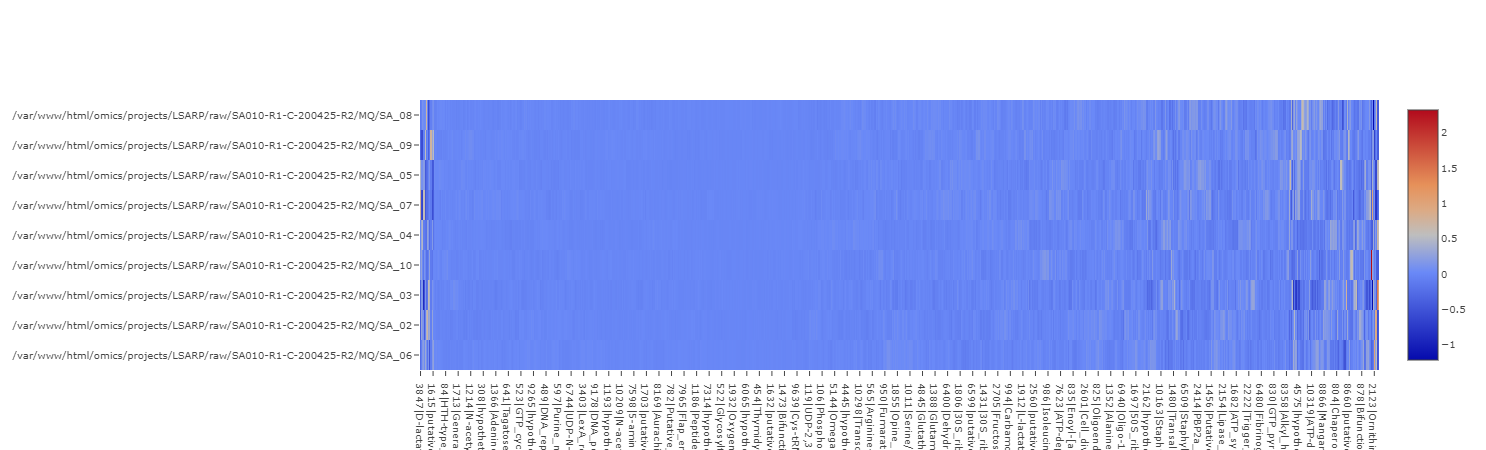

In [23]:
plotly_heatmap(df2)

In [100]:
def plotly_dendrogram(df: pd.DataFrame(), labels=None, 
                      orientation='left', color_threshold=0,
                      height=None, width=None, max_label_lenght=30):
    if labels is None:
        labels = df.index
    
    if max_label_lenght is not None:
        labels = [i[:max_label_lenght] for i in labels]
        
    if height is None:
        height = max(300, 10*len(df))
    fig = ff.create_dendrogram(df, color_threshold=color_threshold, 
                               labels=labels, orientation=orientation)
    
    fig.update_layout(width=width, height=height, font_family="Monospace")
    fig.update_layout(xaxis_showgrid=True, yaxis_showgrid=True)
    
    fig.update_yaxes(automargin=True)
    fig.update_xaxes(automargin=True)
    return fig

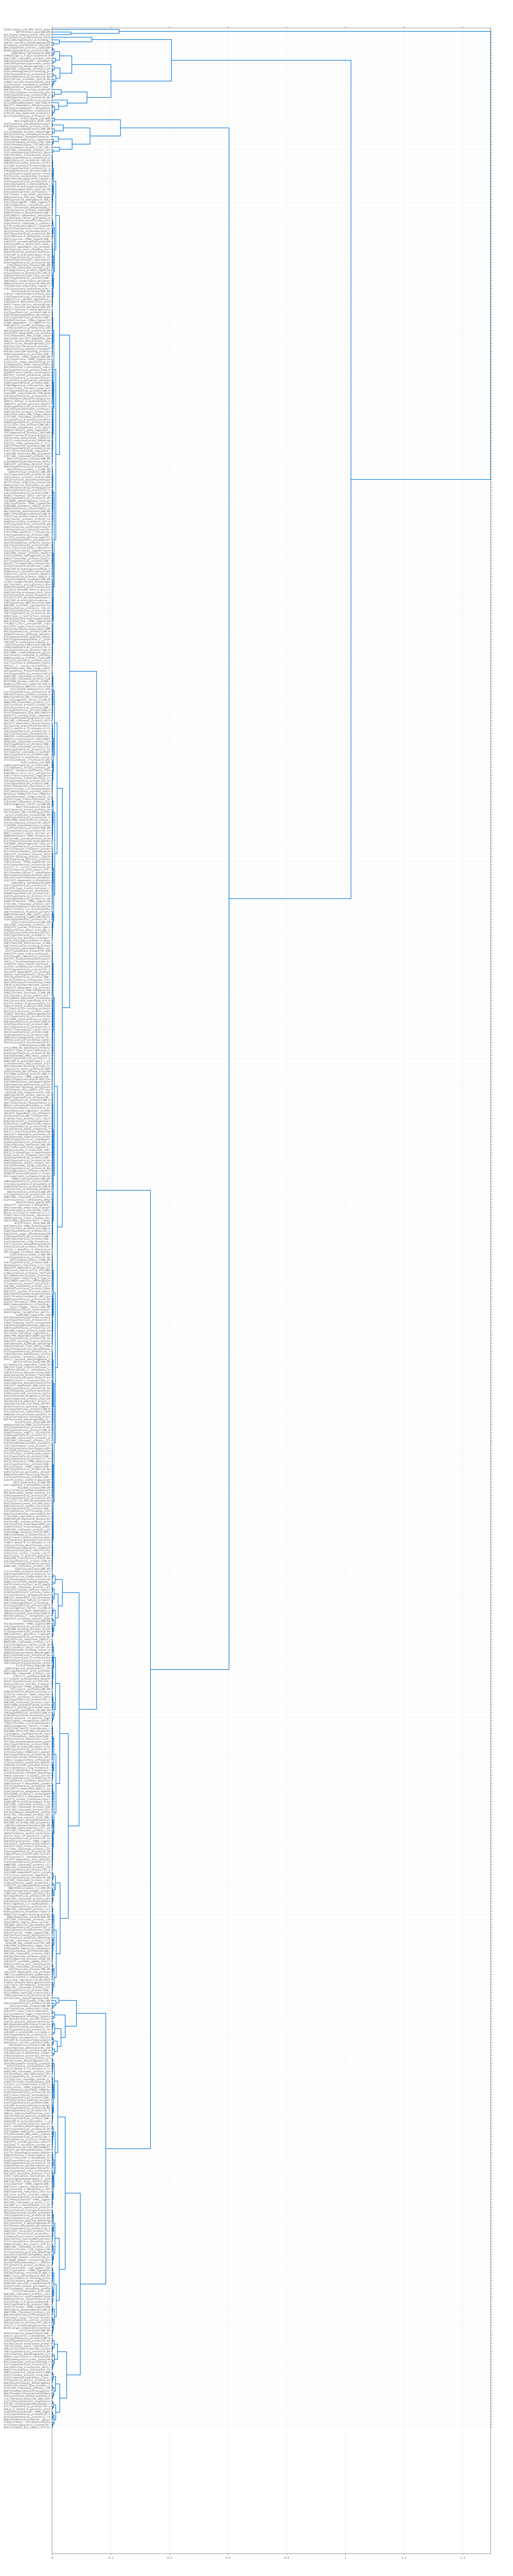

In [121]:
fig = plotly_dendrogram(df.fillna(0).head(1).T)

fig